# Лабораторная работа №3 (Проведение исследований с решающим деревом)

## 2. Создание бейзлайна и оценка качества

#### a.	Обучить модели из sklearn (классификации и регрессии решающим деревом) для выбранных наборов данных

Нужные библиотеки:

In [39]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree   import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, mean_absolute_error, root_mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from scipy.spatial import distance
from collections import Counter

#### Работа с данными

In [40]:
wine_data = pd.read_csv('../data/wine_data.csv')

wine_data["IsGood"] = wine_data["quality"].apply(lambda x: 1 if x >= 7 else 0)

# Если были пропущенные значения
imputer = SimpleImputer(strategy="mean")
wine_data = pd.DataFrame(imputer.fit_transform(wine_data), columns=wine_data.columns)

x_data = wine_data.drop(["quality", "IsGood"], axis=1)

y_class = wine_data["IsGood"]
y_reg = wine_data["quality"]

x_train, x_test, y_train_class, y_test_class = train_test_split(x_data, y_class, test_size=0.2, random_state=42)
x_train, x_test, y_train_reg, y_test_reg = train_test_split(x_data, y_reg, test_size=0.2, random_state=42)


Для упрощения работы создадим универсальные функции:

In [41]:
def test_model_class(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"LogisticRegression:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"F1-score: {f1_score(y_test, y_pred)}")
    plt.figure(figsize=(4,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), 
        cmap="Greys", annot=True, fmt="d", 
        xticklabels=["Bad", "Good"], yticklabels=["Bad", "Good"]
    )
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title("Confusion matrix")
    plt.show()
    
    return model, y_pred

def test_model_reg(model, X_train,X_test, y_train,  y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"LinearRegression:")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred)}")
    print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(y_test, y_pred)}")
    print(f"R-squared (R^2): {r2_score(y_test, y_pred)}")
    
    return model, y_pred

#### Обучение и оценка моделей

LogisticRegression:
Accuracy: 0.871875
F1-score: 0.5393258426966292


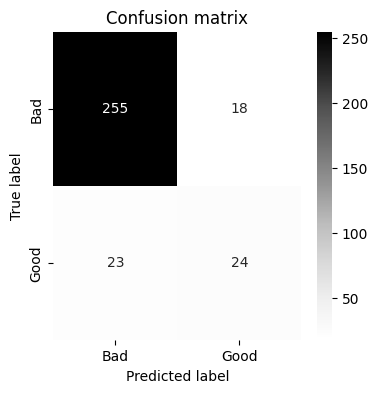

LinearRegression:
Mean Absolute Error (MAE): 0.4625
Root Mean Squared Error (RMSE): 0.7786205751198718
R-squared (R^2): 0.07231130172297862


In [42]:
_, y_std_pred_class = test_model_class(DecisionTreeClassifier(random_state=42),
    x_train, x_test, y_train_class, y_test_class
)

_, y_std_pred_reg = test_model_reg(DecisionTreeRegressor(random_state=42),
    x_train, x_test, y_train_reg, y_test_reg
)


---
## 3. Улучшение бейзлайна

#### a.	Сформулировать гипотезы (препроцессинг данных, визуализация данных, формирование новых признаков, подбор гиперпараметров на кросс-валидации и т.д.)

Проверим 3 гипотезы для увеличения качества оценки качества вина:

1. Масштабирование признаков
2. Формирование новых признаков
3. Подбор гиперпараметров

#### b.	Проверить гипотезы


##### Масштабируем данные

LogisticRegression:
Accuracy: 0.871875
F1-score: 0.5393258426966292


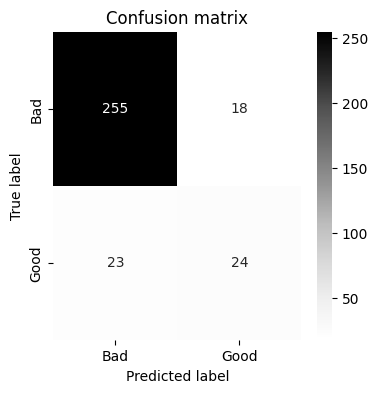

LinearRegression:
Mean Absolute Error (MAE): 0.4625
Root Mean Squared Error (RMSE): 0.7826237921249264
R-squared (R^2): 0.06274750070981339


In [43]:
scaler_std = StandardScaler()
scaled_x_train = scaler_std.fit_transform(x_train)
scaled_x_test = scaler_std.transform(x_test)

_ = test_model_class(DecisionTreeClassifier(random_state=42),
    scaled_x_train,scaled_x_test,y_train_class,y_test_class
)

_ = test_model_reg(DecisionTreeRegressor(random_state=42),
    scaled_x_train,scaled_x_test,y_train_reg,y_test_reg
)

##### Добавление новых признаков, на основе старых данных

LogisticRegression:
Accuracy: 0.878125
F1-score: 0.5517241379310345


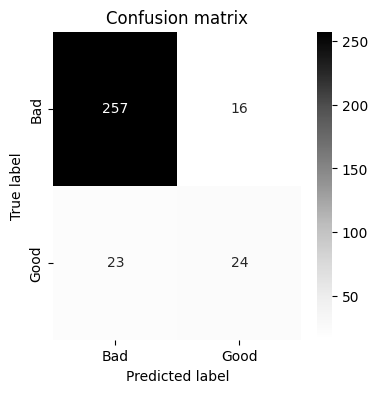

LinearRegression:
Mean Absolute Error (MAE): 0.484375
Root Mean Squared Error (RMSE): 0.7806247497997998
R-squared (R^2): 0.06752940121639606


In [44]:
x_data_new_features = x_data.copy()

x_data_new_features['bound_so2'] = x_data_new_features['total sulfur dioxide'] - x_data_new_features['free sulfur dioxide']
x_data_new_features['other_acidity'] = x_data_new_features['fixed acidity'] - x_data_new_features['volatile acidity'] - x_data_new_features['citric acid']

_ = test_model_class(DecisionTreeClassifier(random_state=42),
    *train_test_split(x_data_new_features, y_class, test_size=0.2, random_state=42)
)

_ = test_model_reg(DecisionTreeRegressor(random_state=42),
    *train_test_split(x_data_new_features, y_reg, test_size=0.2, random_state=42)
)

##### Подбор гиперпараметров

LogisticRegression:
Accuracy: 0.871875
F1-score: 0.4225352112676056


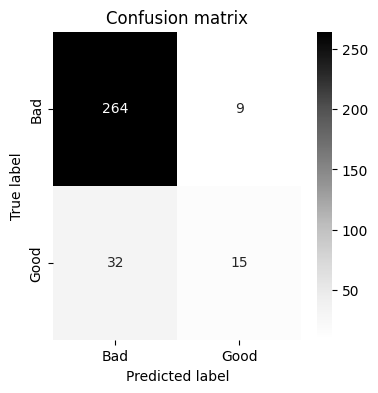

Best parameters: {'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 2}

LinearRegression:
Mean Absolute Error (MAE): 0.5173440925685695
Root Mean Squared Error (RMSE): 0.6585711835256975
R-squared (R^2): 0.33632423099429387
Best parameters: {'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 2}



In [45]:
grid_params = {
    'max_depth': [3, 5,7, 10, None],
    'min_samples_split': [2, 5,7, 10],
    'min_samples_leaf': [1, 2, 4,8],
}

grid_class = GridSearchCV(DecisionTreeClassifier(random_state=42), grid_params, scoring='accuracy')
grid_class, y_pred_class = test_model_class(grid_class,
    scaled_x_train, scaled_x_test, y_train_class, y_test_class
)
print(f"Best parameters: {grid_class.best_params_}")
print()

grid_reg = GridSearchCV(DecisionTreeRegressor(random_state=42), grid_params, scoring='r2')
grid_reg, y_pred_reg = test_model_reg(grid_reg,
    scaled_x_train, scaled_x_test, y_train_reg, y_test_reg
)
print(f"Best parameters: {grid_reg.best_params_}")
print()

#### c-е.	Сформирован улучшенный бейзлайн по результатам проверки гипотез

Обучить модели с улучшенным бейзлайном (для классификации и регрессии) для выбранных наборов данных
Оценить качество моделей с улучшенным бейзлайном (для классификации и регрессии) по выбранным метрикам на выбранных наборах данных

LogisticRegression:
Accuracy: 0.878125
F1-score: 0.5517241379310345


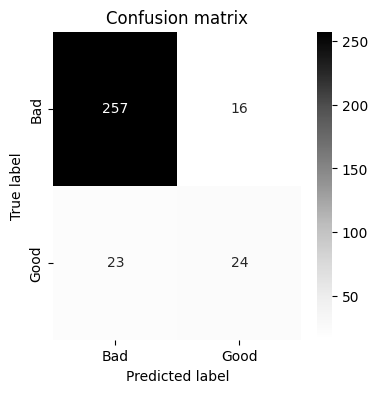

LinearRegression:
Mean Absolute Error (MAE): 0.5110126270092248
Root Mean Squared Error (RMSE): 0.6546871877375182
R-squared (R^2): 0.34412934843831455


In [46]:
wine_data = pd.read_csv('../data/wine_data.csv')
wine_data["IsGood"] = wine_data["quality"].apply(lambda x: 1 if x >= 7 else 0)


imputer = SimpleImputer(strategy="mean")
wine_data = pd.DataFrame(imputer.fit_transform(wine_data), columns=wine_data.columns)

x_data = wine_data.drop(["quality", "IsGood"], axis=1)
x_data_new = x_data.copy()
x_data_new['bound_so2'] = x_data_new['total sulfur dioxide'] - x_data_new['free sulfur dioxide']
x_data_new['other_acidity'] = x_data_new['fixed acidity'] - x_data_new['volatile acidity'] - x_data_new['citric acid']

y_class = wine_data["IsGood"]
y_reg = wine_data["quality"]

x_train, x_test, y_train_class, y_test_class = train_test_split(x_data_new, y_class, test_size=0.2, random_state=42)


_, y_baseline_pred_class = test_model_class(
    DecisionTreeClassifier(random_state=42),
    x_train, x_test, y_train_class, y_test_class
)

_, y_baseline_pred_reg = test_model_reg(
    DecisionTreeRegressor(random_state=42,max_depth=5,min_samples_leaf=8,min_samples_split=2),
    x_train, x_test, y_train_reg, y_test_reg
)

#### f.	Сравнить результаты моделей с улучшенным бейзлайном в сравнении с результатами из пункта 2 

In [47]:
def print_diff(y_test_class, y_pred_class, y_old_pred_class, y_test_reg, y_pred_reg, y_old_pred_reg):
    print(f"Classification:")
    print(f"Increase between old and new predictions classifier:")
    print(f"Accuracy: {accuracy_score(y_test_class, y_pred_class)-accuracy_score(y_test_class, y_old_pred_class)}")
    print(f"F1-score: {f1_score(y_test_class, y_pred_class)-f1_score(y_test_class, y_old_pred_class)}")
    print()
    print(f"Regression:")
    print(f"Increase between old and new predictions regressor:")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test_reg, y_pred_reg)-mean_absolute_error(y_test_reg, y_old_pred_reg)}")
    print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(y_test_reg, y_pred_reg) - root_mean_squared_error(y_test_reg, y_old_pred_reg)}")
    print(f"R-squared: {r2_score(y_test_reg, y_pred_reg)-r2_score(y_test_reg, y_old_pred_reg)}")



print_diff(y_test_class, y_baseline_pred_class, y_std_pred_class, y_test_reg, y_baseline_pred_reg, y_std_pred_reg)

Classification:
Increase between old and new predictions classifier:
Accuracy: 0.006250000000000089
F1-score: 0.012398295234405277

Regression:
Increase between old and new predictions regressor:
Mean Absolute Error: 0.04851262700922476
Root Mean Squared Error (RMSE): -0.1239333873823536
R-squared: 0.27181804671533594


#### g.	Сделать выводы

##### Классификация:
Бейзлайн модель показала улучшение:
- Accuracy увеличилась на 0.0063, что свидетельствует о незначительном улучшении общего процента правильных предсказаний.
- F1-мерa выросла на 0.0124, что особенно важно в условиях несбалансированных данных, так как эта метрика учитывает и точность, и полноту.

Эти изменения показывают, что модель стала немного лучше, однако улучшения всё ещё остаются незначительными.

##### Регрессия:
Обновлённая модель регрессии также показала улучшение:  
- Mean Absolute Error (MAE) снизилась на 0.0485, что указывает на уменьшение среднего отклонения предсказаний от реальных значений.
- Root Mean Squared Error (RMSE) немного ухудшилась (уменьшение на -0.1239), что может быть связано с увеличением крупных ошибок в предсказаниях.
- R-squared вырос на 0.2718, что указывает на значительное улучшение способности модели объяснять дисперсию данных.
В общем, новый бейзлайн регрессора продемонстрировал заметное улучшение общей точности (R²), хотя увеличившийся RMSE может указывать на необходимость дальнейшей настройки модели, чтобы минимизировать крупные ошибки.


---

## 4.	Имплементация алгоритма машинного обучения 

#### a.	Самостоятельно имплементировать алгоритмы машинного обучения (для классификации и регрессии)

Классификация:

In [48]:
class DecisionTreeClassifierCustom:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, features, target):
        if isinstance(features, pd.DataFrame):
            features = features.values
        self.tree = self._build_tree(features, target, depth=0)

    def _build_tree(self, features, target, depth):
        if len(set(target)) == 1 or (self.max_depth and depth == self.max_depth):
            return self._majority_class(target)

        best_split = self._find_best_split(features, target)
        if best_split is None:
            return self._majority_class(target)

        left_indices = features[:, best_split['feature']] <= best_split['value']
        right_indices = ~left_indices

        left_tree = self._build_tree(features[left_indices], target[left_indices], depth + 1)
        right_tree = self._build_tree(features[right_indices], target[right_indices], depth + 1)

        return {
            'feature': best_split['feature'],
            'value': best_split['value'],
            'left': left_tree,
            'right': right_tree
        }

    def _find_best_split(self, features, target):
        best_split = None
        best_score = float('inf')

        for feature in range(features.shape[1]):
            possible_values = set(features[:, feature])
            for value in possible_values:
                left_indices = features[:, feature] <= value
                right_indices = ~left_indices

                if len(left_indices) == 0 or len(right_indices) == 0:
                    continue

                left_y, right_y = target[left_indices], target[right_indices]
                score = self._calculate_split_score(left_y, right_y)

                if score < best_score:
                    best_score = score
                    best_split = {'feature': feature, 'value': value}

        return best_split

    def _calculate_split_score(self, left_y, right_y):
        def gini_impurity(y):
            classes, counts = np.unique(y, return_counts=True)
            probabilities = counts / len(y)
            return 1 - np.sum(probabilities ** 2)

        left_score = gini_impurity(left_y) * len(left_y)
        right_score = gini_impurity(right_y) * len(right_y)
        return left_score + right_score

    def _majority_class(self, target):
        classes, counts = np.unique(target, return_counts=True)
        return classes[np.argmax(counts)]

    def predict(self, features):
        if isinstance(features, pd.DataFrame):
            features = features.values
        return np.array([self._predict_sample(x, self.tree) for x in features])

    def _predict_sample(self, x, tree):
        if isinstance(tree, dict):
            if x[tree['feature']] <= tree['value']:
                return self._predict_sample(x, tree['left'])
            else:
                return self._predict_sample(x, tree['right'])
        else:
            return tree


Регрессия:

In [49]:
class DecisionTreeRegressorCustom:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, features, target):
        if isinstance(features, pd.DataFrame):
            features = features.values
        self.tree = self._build_tree(features, target, depth=0)

    def _build_tree(self, features, target, depth):
        if len(set(target)) == 1 or (self.max_depth and depth == self.max_depth):
            return np.mean(target)
        best_split = self._find_best_split(features, target)
        if best_split is None:
            return np.mean(target)

        left_indices = features[:, best_split['feature']] <= best_split['value']
        right_indices = ~left_indices
        left_tree = self._build_tree(features[left_indices], target[left_indices], depth + 1)
        right_tree = self._build_tree(features[right_indices], target[right_indices], depth + 1)

        return {
            'feature': best_split['feature'],
            'value': best_split['value'],
            'left': left_tree,
            'right': right_tree
        }

    def _find_best_split(self, features, target):
        best_split = None
        best_score = float('inf')

        for feature in range(features.shape[1]):
            possible_values = set(features[:, feature])
            for value in possible_values:
                left_indices = features[:, feature] <= value
                right_indices = ~left_indices

                if len(left_indices) == 0 or len(right_indices) == 0:
                    continue

                left_y, right_y = target[left_indices], target[right_indices]
                score = self._calculate_split_score(left_y, right_y)

                if score < best_score:
                    best_score = score
                    best_split = {'feature': feature, 'value': value}

        return best_split

    def _calculate_split_score(self, left_y, right_y):
        left_score = np.var(left_y) * len(left_y)
        right_score = np.var(right_y) * len(right_y)
        return left_score + right_score

    def predict(self, features):
        if isinstance(features, pd.DataFrame):
            features = features.values
        return np.array([self._predict_sample(x, self.tree) for x in features])

    def _predict_sample(self, x, tree):
        if isinstance(tree, dict):
            if x[tree['feature']] <= tree['value']:
                return self._predict_sample(x, tree['left'])
            else:
                return self._predict_sample(x, tree['right'])
        else:
            return tree


#### b-с.	Обучить имплементированные модели (для классификации и регрессии) для выбранных наборов данных

Оценить качество имплементированных моделей (для классификации и регрессии) по выбранным метрикам на выбранных наборах данных

Классификация:

LogisticRegression:
Accuracy: 0.884375
F1-score: 0.6021505376344086


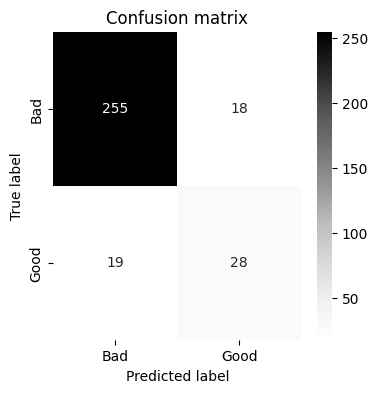

In [50]:
_, y_custom_pred_class = test_model_class(DecisionTreeClassifierCustom(max_depth=10),
    *train_test_split(x_data, y_class, test_size=0.2, random_state=42)
)

Регрессия:

In [51]:
_ , y_custom_pred_reg = test_model_reg(DecisionTreeRegressorCustom(max_depth=5),
    *train_test_split(x_data,y_reg,test_size=0.2,random_state=42)
)

LinearRegression:
Mean Absolute Error (MAE): 0.4916684825601216
Root Mean Squared Error (RMSE): 0.6397351577285942
R-squared (R^2): 0.37374536714110185


#### d.	Сравнить результаты имплементированных моделей в сравнении с результатами из пункта 2 

In [52]:
print_diff(
    y_test_class, y_custom_pred_class,y_std_pred_class,
    y_test_reg,y_custom_pred_reg,y_std_pred_reg
)

Classification:
Increase between old and new predictions classifier:
Accuracy: 0.012500000000000067
F1-score: 0.06282469493777942

Regression:
Increase between old and new predictions regressor:
Mean Absolute Error: 0.029168482560121556
Root Mean Squared Error (RMSE): -0.13888541739127758
R-squared: 0.30143406541812323


#### e.	Сделать выводы

Классификация:

Результаты новой кастомной модели показали улучшение по сравнению со стандартной:

- Точность (Accuracy) увеличилась на 0.0125 (1.25%), что свидетельствует о небольшом, но стабильном росте доли правильных классификаций.
- F1-мерa увеличилась на 0.0628 (6.28%), что особенно важно в условиях несбалансированности классов, так как улучшение полноты и точности говорит о более качественной работе модели с редкими категориями.

Регрессия:

В задачах регрессии улучшение более значительное:

- Средняя абсолютная ошибка (MAE) снизилась на 0.0292, что указывает на повышение точности предсказаний модели.
- Квадратный корень из среднеквадратичной ошибки (RMSE) снизился на -0.1389, что подтверждает уменьшение крупных отклонений в прогнозах.
- R² (коэффициент детерминации) увеличился на 0.3014, что указывает на значительно более высокую способность новой модели объяснять вариативность данных.

#### f-h.	Добавить техники из улучшенного бейзлайна (пункт 3с)

Обучить модели (для классификации и регрессии) для выбранных наборов данных

Оценить качество моделей (для классификации и регрессии) по выбранным метрикам на выбранных наборах данных

LogisticRegression:
Accuracy: 0.878125
F1-score: 0.5894736842105263


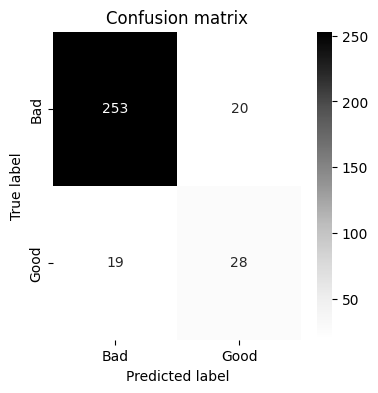

LinearRegression:
Mean Absolute Error (MAE): 0.4897185079105023
Root Mean Squared Error (RMSE): 0.6438486794481588
R-squared (R^2): 0.3656657915453171


In [54]:
wine_data = pd.read_csv('../data/wine_data.csv')
wine_data["IsGood"] = wine_data["quality"].apply(lambda x: 1 if x >= 7 else 0)


imputer = SimpleImputer(strategy="mean")
wine_data = pd.DataFrame(imputer.fit_transform(wine_data), columns=wine_data.columns)

x_data = wine_data.drop(["quality", "IsGood"], axis=1)
x_data_new = x_data.copy()
x_data_new['bound_so2'] = x_data_new['total sulfur dioxide'] - x_data_new['free sulfur dioxide']
x_data_new['other_acidity'] = x_data_new['fixed acidity'] - x_data_new['volatile acidity'] - x_data_new['citric acid']

y_class = wine_data["IsGood"]
y_reg = wine_data["quality"]

x_train, x_test, y_train_class, y_test_class = train_test_split(x_data_new, y_class, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

_, y_custom_baseline_pred_class = test_model_class(
    DecisionTreeClassifierCustom(max_depth=10),
    x_train, x_test, y_train_class, y_test_class
)

_, y_custom_baseline_pred_reg = test_model_reg(
    DecisionTreeRegressorCustom(max_depth=5),
    x_train, x_test, y_train_reg, y_test_reg
)

#### i.	Сравнить результаты моделей в сравнении с результатами из пункта 3

In [55]:
print_diff(
    y_test_class,y_custom_baseline_pred_class,y_baseline_pred_class,
    y_test_reg,y_custom_baseline_pred_reg, y_baseline_pred_reg
)

Classification:
Increase between old and new predictions classifier:
Accuracy: 0.0
F1-score: 0.037749546279491786

Regression:
Increase between old and new predictions regressor:
Mean Absolute Error: -0.021294119098722475
Root Mean Squared Error (RMSE): -0.010838508289359394
R-squared: 0.021536443107002534


#### j.	Сделать выводы

Сравнение старой и новой реализации классификатора показывает незначительное улучшение метрики F1-score, с увеличением на 0.0377. Однако метрика Accuracy осталась неизменной (0.0). Это может указывать на то, что новая модель лучше справляется с более редкими или сложными классами, не изменяя общее распределение правильных предсказаний.

Регрессия:
Результаты регрессора показывают незначительное ухудшение в метриках MAE (увеличение на -0.0213) и RMSE (увеличение на -0.0108). Однако метрика R² улучшилась на 0.0215, что говорит о том, что новая модель лучше объясняет дисперсию данных. Это может быть связано с тем, что модель более точно улавливает общую зависимость между переменными, несмотря на небольшие ухудшения в точности предсказаний.

Общий вывод:
Новая модель классификации показала улучшение в F1-score, что делает её более пригодной для работы с несбалансированными классами.
Для регрессии наблюдается более точное объяснение данных (рост R²). Это указывает на улучшение модели.